# ANALYIS/OBSERVATIONs:

•Ketapril has the largest Interquartile range, this drug regimen had the largest difference between the data in the 25th, 50th and 75th percentile. 

•Capomulin and Ramican have been tried more on mice than anyother formula drugs.

•The reliability of the data seems very strong for the studies involving the 4 drugs (Capomulin, Ramicane, Infubinol, Ceftamin) as there is only 1 outlier (refer to box and whisker plot). 

•The average size of tumor volume is directly propotional to average weight of mice. More the weight of mice, more will be size of tumor.

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Read data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined_mouse_complete = pd.merge(study_results, mouse_metadata, how="left",
                               on=["Mouse ID", "Mouse ID"])


# Display the data table for preview
combined_mouse_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [23]:
# Preparing data- Checking the number of mice.
mouse_count = mouse_metadata.shape[0]
mouse_count

249

In [24]:
# Preparing data- Get all the data for the duplicate mouse ID. 
combined_mouse_complete.loc[mouse_complete.duplicated(subset=["Mouse ID","Timepoint"],keep=False)]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [25]:
# Preparing data- Getting each duplicate mice found in the data based on the Mouse ID and Timepoint 
combined_mouse_complete.loc[mouse_complete.duplicated(subset=["Mouse ID","Timepoint"],keep=False)]["Mouse ID"].unique()

array(['g989'], dtype=object)

In [26]:
# Preparing data- Removing duplicate mice ID to get clean DataFrame.
combined_mouse_complete.loc[mouse_complete["Mouse ID"]!="g989"]["Mouse ID"].nunique()

248

In [30]:
# Preparing data- Creating a clean DataFrame by dropping the duplicate mouse by its ID.
clean_dataframe = combined_mouse_complete.loc[mouse_complete["Mouse ID"]!="g989"]
clean_dataframe

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [32]:
# Preparing data-Checking the number of mice in the clean DataFrame.
clean_number = clean_dataframe["Mouse ID"].nunique()
clean_number

248

# Generating Summary Statistics

In [54]:
summary_dataframe = clean_dataframe.groupby("Drug Regimen")

# Using groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# calculating mean, median, variance, standard deviation, and SEM of the tumor volume. 

tumor_mean = summary_dataframe["Tumor Volume (mm3)"].mean()
tumor_median = summary_dataframe["Tumor Volume (mm3)"].median()
tumor_var = summary_dataframe["Tumor Volume (mm3)"].var()
tumor_std = summary_dataframe["Tumor Volume (mm3)"].std()
tumor_sem = summary_dataframe["Tumor Volume (mm3)"].sem()

# Gathering all the summary statistics data into a single summary DataFrame as required.

clean_dataframe.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})

#display new DF
single_summary_dataframe

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [55]:
single_summary_statistics_table=clean_dataframe.groupby("Drug Regimen").describe().iloc[:,8:15]
single_summary_statistics_table

Tumor Volume (mm3)                                             \
                          count       mean       std        min        25%   
Drug Regimen                                                                 
Capomulin                 230.0  40.675741  4.994774  23.343598  37.685933   
Ceftamin                  178.0  52.591172  6.268188  45.000000  47.208427   
Infubinol                 178.0  52.884795  6.567243  36.321346  47.312353   
Ketapril                  188.0  55.235638  8.279709  45.000000  48.232987   
Naftisol                  186.0  54.331565  8.134708  45.000000  47.285874   
Placebo                   181.0  54.033581  7.821003  45.000000  47.459053   
Propriva                  148.0  52.320930  6.622085  45.000000  46.894328   
Ramicane                  228.0  40.216745  4.846308  22.050126  36.674635   
Stelasyn                  181.0  54.233149  7.710419  45.000000  48.047139   
Zoniferol                 182.0  53.236507  6.966589  45.000000  47.337876   

                                    
                    50%        75%  
Drug Regimen                        
Capomulin     41.557809  45.000000  
Ceftamin      51.776157  56.801438  
Infubinol     51.820584  57.314444  
Ketapril      53.698743  60.870951  
Naftisol      52.509285  59.963034  
Placebo       52.288934  59.916934  
Propriva      50.446266  56.491585  
Ramicane      40.673236  45.000000  
Stelasyn      52.431737  58.719297  
Zoniferol     51.818479  57.954259

# Bar and Pie Charts

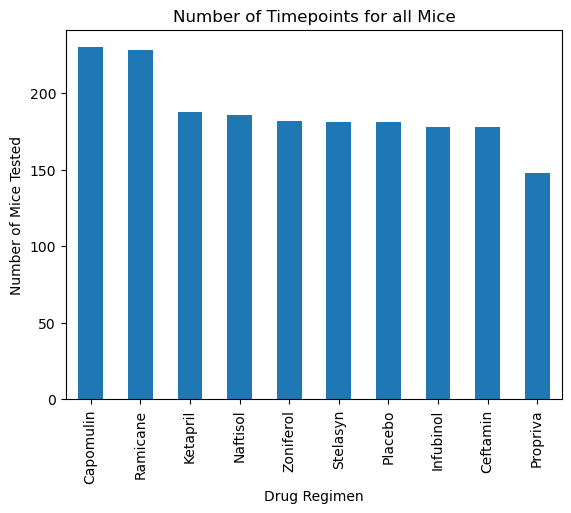

In [59]:
# Generating a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

#using the combined CSV DF created initially: combined_mouse_complete

bar_graph = clean_dataframe["Drug Regimen"].value_counts().plot.bar()

#Setting up titles for the chart
bar_graph.set_title("Number of Timepoints for all Mice")
bar_graph.set_xlabel("Drug Regimen")
bar_graph.set_ylabel("Number of Mice Tested")

plt.savefig("Total Timepoints by Drug Regimen.png")
plt.show()

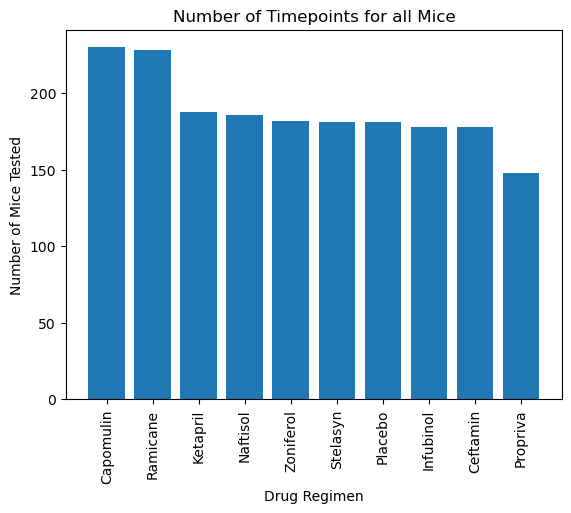

In [60]:
# A bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot 
vals = clean_dataframe["Drug Regimen"].value_counts()
plt.bar(x=vals.index, height=vals.values)
plt.xticks(rotation=90)

plt.title("Number of Timepoints for all Mice")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.show()

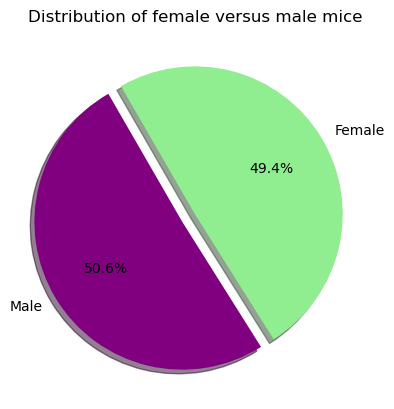

In [64]:
# generating pie plot showing the distribution of female versus male mice using Pandas 
mouse_gender = combined_mouse_complete.loc[:, ["Sex"]]

labels = ["Male", "Female"]
gender = mouse_gender["Sex"].value_counts()
colors= ['purple', 'lightgreen']
explode = [0.1,0]

gender_count = plt.pie(gender, explode=explode, labels=labels, colors=colors, 
                       autopct="%1.1f%%", shadow=True, startangle=120)
plt.title("Distribution of female versus male mice")
plt.savefig("Distribution of female versus male mice.png")

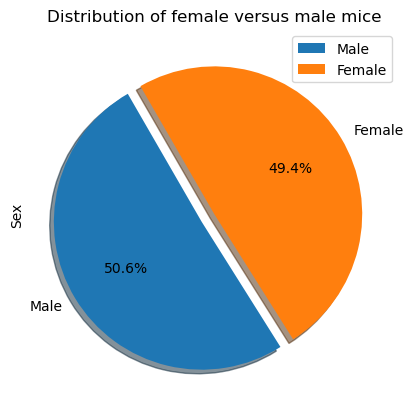

In [66]:
# Generating a pie plot showing the distribution of female versus male mice using pyplot
gender_plot = gender.plot(kind="pie", title="Distribution of female versus male mice", explode=explode, startangle=120, autopct="%1.1f%%", shadow=True)
gender_plot.legend(['Male', "Female"])

# Calculate Quartiles, Find Outliers, and Create a Box Plot

In [68]:


# Getting the last (maximum) timepoint for each mouse
group_by_mouse_ID = combined_mouse_complete.groupby("Mouse ID")
max_timepoint = group_by_mouse_ID['Timepoint'].max()
max_timepoint = max_timepoint.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_timepoint_volume = max_timepoint.merge(combined_mouse_complete, on=["Mouse ID", "Timepoint"], how="left")
max_timepoint_volume

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [72]:
# A DatFrame that has the last timepoint for each mouse ID is created using groupby. 
# The index of the DataFrame is reset. 
# Retrieve the maximum timepoint for each mouse. 

last_timepoint_dataframe= clean_dataframe.groupby("Mouse ID").Timepoint.max()
last_timepoint_dataframe


# Merge this group dataframe original DataFrame to get the tumor volume at the last timepoint
merged_dataframe= pd.merge(last_timepoint_dataframe,clean_dataframe, on=["Mouse ID","Timepoint"],how="left")

#display dataframe
merged_dataframe

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [82]:
 # Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)
#the list looks to be differentiated by drugs, create a subset for the different drugs

mouse_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
mouse_drug_values = []

for x in mouse_drugs: 
    #find rows where mouse treated by drug 
    treatment_rows= merged_dataframe.loc[merged_df["Drug Regimen"]==x]["Tumor Volume (mm3)"]
    mouse_drug_values.append(treatment_rows)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

#IQR = Q3-Q1 (to find upper and lower bounds)

    quartiles = treatment_rows.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(iqr)
    
    lowerbound = lowerq - (1.5*iqr)
    upperbound = upperq + (1.5*iqr)
    
    #filter whether higher or lower bound
    outliers = treatment_rows.loc[(treatment_rows<lower_bound) | (treatment_rows>upper_bound)]
    print(outliers)

7.781863460000004
174    23.343598
Name: Tumor Volume (mm3), dtype: float64
9.098536719999998
96    22.050126
Name: Tumor Volume (mm3), dtype: float64
11.477135160000003
Series([], Name: Tumor Volume (mm3), dtype: float64)
15.577752179999997
Series([], Name: Tumor Volume (mm3), dtype: float64)


# Box plot plotting

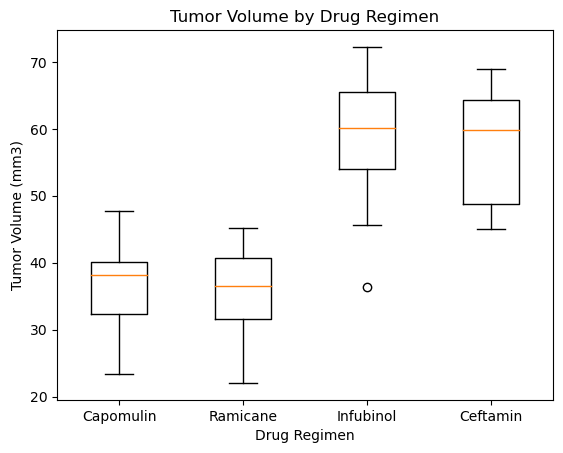

In [83]:
# Generating a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
x = [1,2,3,4]
ax1.set_title('Tumor Volume by Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(tumor_volume)
plt.xticks(x, drug_regimens)

plt.show()

# Create a Line Plot and a Scatter Plot

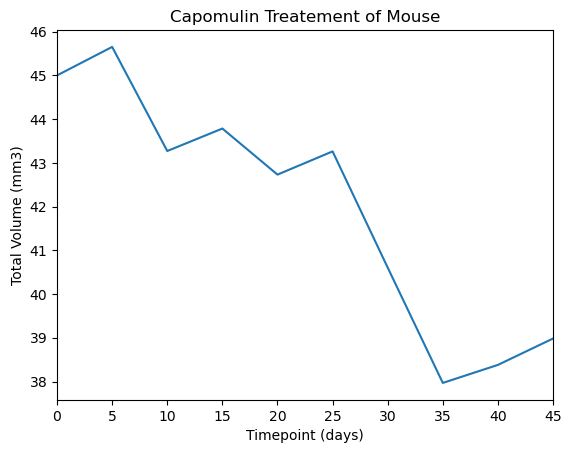

In [86]:
capomulin_treated=combined_mouse_complete.set_index('Drug Regimen').loc['Capomulin',:].sort_values(['Mouse ID','Timepoint'])

capomulin_treated
single_mouse=capomulin_treated.iloc[0,0]
single_mouse
capomulin_mouse_df=capomulin_treated.loc[capomulin_treated.iloc[:,0]==single_mouse,:]
x_axis=capomulin_mouse_df.iloc[:,1]
tvol=capomulin_mouse_df.iloc[:,2]
plt.plot(x_axis,tvol)
plt.xlim(0,45)
plt.xlabel("Timepoint (days)")
plt.ylabel("Total Volume (mm3)")
plt.title("Capomulin Treatement of Mouse")
plt.show()

C:\Users\dryas\AppData\Local\Temp\ipykernel_27488\1388314522.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Average_volume = Capomulin_drug.groupby(['Mouse ID']).mean()


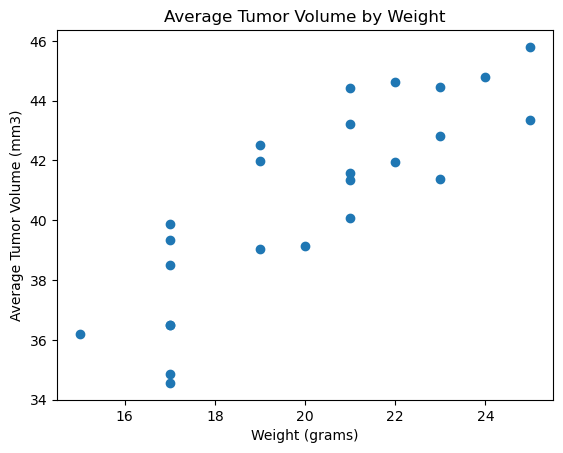

In [95]:
# Generating a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capomulin_drug = combined_mouse_complete.loc[combined_mouse_complete["Drug Regimen"] == "Capomulin"]
Average_volume = Capomulin_drug.groupby(['Mouse ID']).mean()

Avg_tumor_vol = Average_volume['Tumor Volume (mm3)']
Avg_weight = Average_volume['Weight (g)']

#creating the scatter plot

plt.scatter(mean_vol["Weight (g)"],mean_vol["Tumor Volume (mm3)"])
plt.xlabel("Weight (grams)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume by Weight")

plt.show()

The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.84


Text(0.5, 1.0, 'Regression by Average Mouse Weight v Average Tumor Volume')

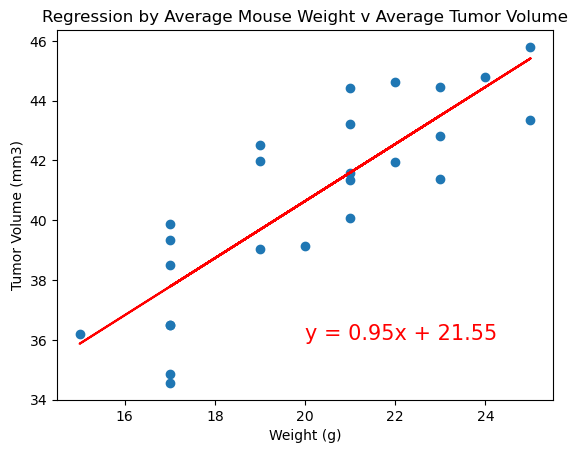

In [98]:
# Calculating the correlation coefficient and linear regression model 

correlation = st.pearsonr(Avg_weight,Avg_tumor_vol)
print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {round(correlation[0],2)}")

#cralinear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(Avg_weight, Avg_tumor_vol)
#y = mx + b
regress_values = slope * Avg_weight  + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(Avg_weight,Avg_tumor_vol)
plt.plot(Avg_weight,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")

plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Regression by Average Mouse Weight v Average Tumor Volume")